In [28]:
%matplotlib inline

In [29]:
# the name of the backend layer conventions which is different.
# you'll access variables using get & set, remember you can hit `Tab`.

import matplotlib as mpl
mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

In [30]:
import matplotlib.pyplot as plt
plt.plot?

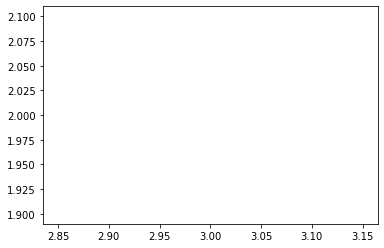

In [31]:
# this brings us just an empty figure with limits 3(x),2(y)
# because we didn't assign how the points would be rendered.
plt.plot(3,2)

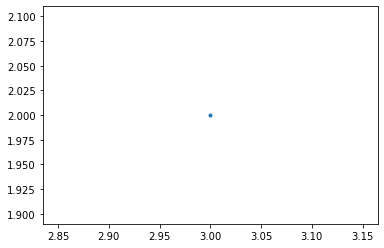

In [32]:
plt.plot(3,2,'.')

In [33]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
canvas.print_png('test.png')

In [34]:
%%html
<img src= 'test.png' />

(0.0, 6.0, 0.0, 10.0)

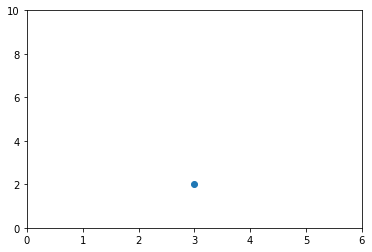

In [35]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

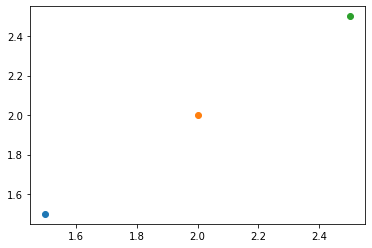

In [36]:
# create a new figure 
plt.figure()

plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

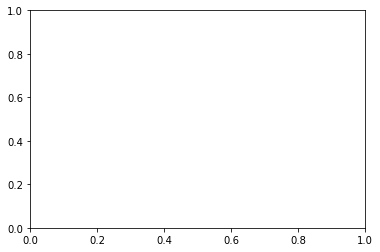

In [37]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

# keep in mind:
- One, pyplot is going to retrieve the current figure with the function `gcf` and then get the current axis with the function`gca`.
- Pyplot is keeping track of the axis objects for you. But don't forget that they're there and we can get them when we want to get them.
____
- Two, also pyplot just mirrors the API of the axis objects. So you can call the plot function against the pyplot module. But this is calling the axis plot functions underneath, so be aware.

- finally, remember that the function declaration from most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties you can control through these keyword arguments. And I'll start peppering in some of them this week to demostrate that the matplotlib documentation isreally key in gaining a full understanding of the options available.

# Scatterplots

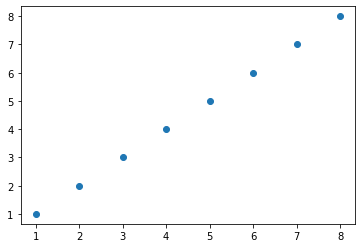

In [39]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x

# create figure
plt.figure()
plt.scatter(x,y);

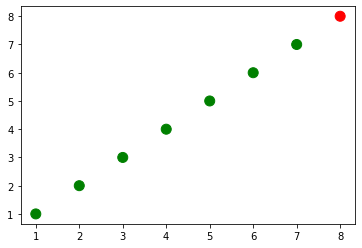

In [43]:
# scatter doesn't represent our items as series.
# instead, we can pass a list of colors which correspond  to a given points.
# let's make all the points colored by grean except last point(red)

x = np.array([1,2,3,4,5,6,7,8])
y = x
# create a list of 'greens' for all and 'red' for the last one.
colors = ['green']*(len(x)-1)
colors.append('red')

#create figure
plt.figure()
plt.scatter(x,y,s = 100 , c = colors)

### Remember: `zip,lambda,list comprehintion`

In [48]:
# it is used to combine the data points from different axis together. 
zip_generator = zip([1,2,3,4,5,6],[7,8,9,10,11,12])
list(zip_generator)

[(1, 7), (2, 8), (3, 9), (4, 10), (5, 11), (6, 12)]

In [49]:
# what if i have the tuples like above and i want to unpack x & y.
zip_generator = zip([1,2,3,4,5,6],[7,8,9,10,11,12])
x,y = zip(*zip_generator)

print(x)
print(y)

(1, 2, 3, 4, 5, 6)
(7, 8, 9, 10, 11, 12)


### Let's get back to ploting.

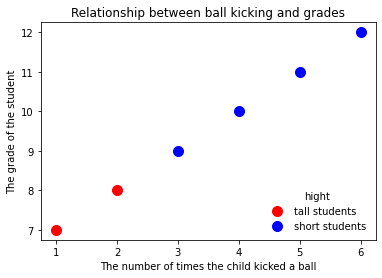

In [75]:
# lets use x and y we just unpacked to create a scatter 
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c= 'red'  , label = 'tall students')
plt.scatter(x[2:], y[2:], s=100, c= 'blue'  , label = 'short students')

# lets add titles
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

#lets create a legend once you assigned labels in plt.scatter()
plt.legend(loc = 4 , frameon = False , title = 'hight');

# loc= 4 quarters

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

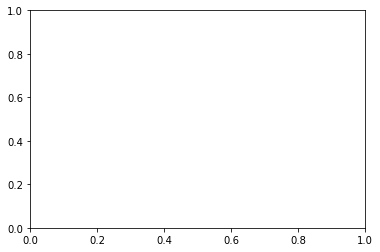

In [76]:
plt.gca().get_children()

# Line Plots
the key deffirence here that we give the plot function only the y-axis data , and it can figure out that we want to plot this data with respect to their indexes which is very useful method.

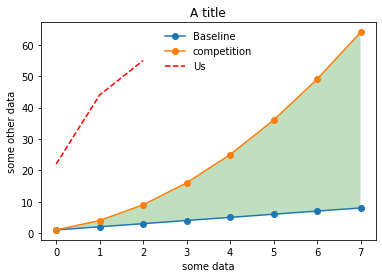

In [105]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2
dashed_line = np.array([22,44,55])

plt.figure()
plt.plot(linear_data , '-o',quadratic_data , '-o' ,dashed_line,'--r' )

plt.xlabel('some data')
plt.ylabel('some other data')
plt.title('A title')
plt.legend(['Baseline','competition','Us'], frameon= False)

# what if i want to highlight the gap between the orange & blue lines.
# we use fill_between() function which takes the data points (y_axis)
# and the indexes (x-axis).
plt.gca().fill_between(range(len(linear_data)),
                       linear_data,
                       quadratic_data,
                       facecolor = 'green',
                       alpha = 0.25);

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08'],
      dtype='datetime64[D]')

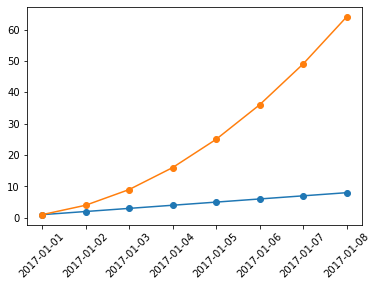

In [130]:
# Most of the times these indexes would be `Dates` so lets try it out:
# create a list of 8 dates from 1/1 to 8/1 using np.arange().
dates = np.arange('2017-01-01','2017-01-09' , dtype='datetime64[D]')
plt.plot(dates,linear_data , '-o',dates,quadratic_data , '-o')
plt.xticks(rotation=45);

dates

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00')]

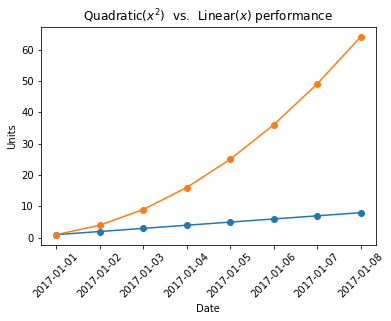

In [139]:
# to deal with datetime objects there are a dozens of ways to do so 
# one of them are pd.to_datetime() 
import pandas as pd
dates = np.arange('2017-01-01','2017-01-09' , dtype='datetime64[D]')
# to make a timestamp for all of the dates we'll use `map()` to iterate over
# them ,but be careful about the map object it brings, you have to put in a 
# list.
dates = list(map(pd.to_datetime,dates))
plt.plot(dates,linear_data , '-o',dates,quadratic_data , '-o')
# plt.xticks(rotation=45)

# another way to access the x-axis and modify the location of the labels:
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic($x^2$)  vs.  Linear($x$) performance');

dates

# Bar Charts

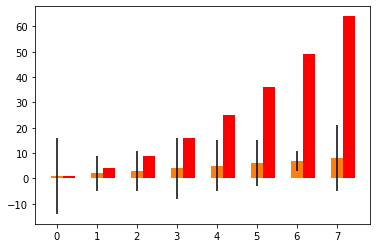

In [156]:
plt.figure()

# Linear data
xvals = range(len(linear_data))
plt.bar(xvals,linear_data, width=0.3)

# Quadratic data
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
plt.bar(new_xvals,quadratic_data, width=0.3 , color= 'red');

# Error data in linear
from random import randint
linear_err = [randint(0,15) for  x in range(len(linear_data))]
plt.bar(xvals, linear_data, width=0.3, yerr=linear_err);

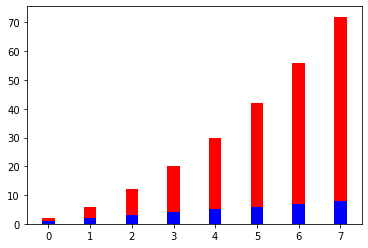

In [160]:
# stacked bar by assigning the buttom parameter to the other data & so forth.
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3 , color='b')
plt.bar(xvals, quadratic_data, width=0.3 ,bottom= linear_data, color='r');

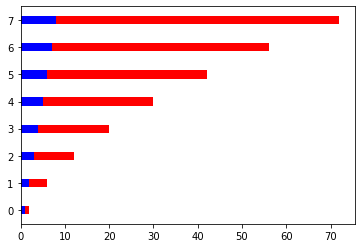

In [161]:
# we can make it horizontally. `bar-barh | width-height | bottom-left`
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height=0.3 , color='b')
plt.barh(xvals, quadratic_data, height=0.3 ,left= linear_data, color='r');

# Dejunkifying a Plot

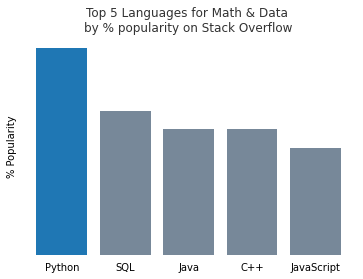

In [177]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# TODO: make all the bars gray except python bar make it blue to stand out.
color = ['#1F77B4',
         'lightslategrey','lightslategrey','lightslategrey','lightslategrey']
plt.bar(pos, popularity, align='center', color = color)

plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(left = False,bottom = False,labelleft = False)

# TODO: remove the frame of the chart
# Selecting the axis-X making the bottom and top axes False.
plt.tick_params(axis='x', which='both', bottom=False,top=False)
# Selecting the axis-Y making the right and left axes False
plt.tick_params(axis='y', which='both', right=False,left=False)
# Iterating over all the axes in the figure
# and make the Spines Visibility as False
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    

plt.show()

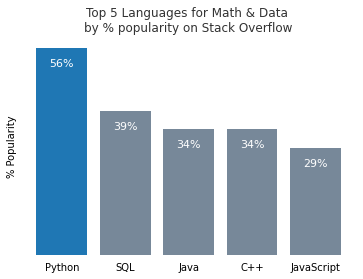

In [182]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# TODO: make all the bars gray except python bar make it blue to stand out.
#                            ~another way~
# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(left = False,bottom = False,labelleft = False)

# TODO: remove the frame of the chart
# Selecting the axis-X making the bottom and top axes False.
plt.tick_params(axis='x', which='both', bottom=False,top=False)
# Selecting the axis-Y making the right and left axes False
plt.tick_params(axis='y', which='both', right=False,left=False)
# Iterating over all the axes in the figure
# and make the Spines Visibility as False
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
    

plt.show()